# <span style="color:purple">Predicting Diabetes </span>


#### Metis Classification Module - Elisabeth johnson

##### Goal: We hope to predict patients who are prediabetic using a dataset with over 10 features and over 200K rows.
##### Process: Below we observe initial results for Random Forest, Logistic Regression, and KNN classifier models
##### Results: Random Forrest and KNN perform the best

In [1]:
#importing dataset
import os
#import opendatasets as od
import pandas as pd
import numpy as np

#Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#For Missing Value and Feature Engineering
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

import time

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal
from datetime import datetime,timedelta
import datetime
from datetime import timedelta
import time

df1 = pd.read_csv('diabetes.csv')

In [2]:
df1.drop_duplicates(inplace = True)

In [3]:
df4_copy = df1.copy()

In [4]:
df4_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  

In [5]:
msk = (df1["Diabetes_012"]==2.0) | (df1["Diabetes_012"]==0.0) 

In [6]:
master1 = df1[msk]

In [7]:
master = master1.copy()

In [8]:
master['Diabetes_012'].replace({2 : 1}, inplace=True)


In [9]:
X = master.drop(["Diabetes_012"], axis = 1) #, "PhysHlth", 'CholCheck' , 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'Stroke'], axis = 1) # remove from the ENTIRE data set.
y = master["Diabetes_012"]

#remove non-important features

## Clean and prepare data

##### Oversample to account for imbalanced data

In [10]:
non_dia= master[master["Diabetes_012"]==0]
dia = master[master["Diabetes_012"]==1]

dia_os = dia.sample(len(non_dia), replace=True)

df_new = pd.concat([dia_os, non_dia], axis=0)

In [11]:
df_new['Diabetes_012'].value_counts()

0.0    190055
1.0    190055
Name: Diabetes_012, dtype: int64

In [12]:
#Train_test_split
# input
x = df_new.iloc[:, 1:].values
 
# output
y = df_new.iloc[:, 0].values

##### train and split the data

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

##### Feature normalizationa and noise reduction

In [14]:
#normalize features

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
#reduction of noise and correalted features since many of them may be related.

from sklearn.decomposition import PCA
 
pca = PCA(n_components = 21)
 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
 
explained_variance = pca.explained_variance_ratio_

## Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [17]:
y_pred = classifier.predict(x_test) # issue

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27169 10591]
 [ 9283 28979]]
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     37760
         1.0       0.73      0.76      0.74     38262

    accuracy                           0.74     76022
   macro avg       0.74      0.74      0.74     76022
weighted avg       0.74      0.74      0.74     76022



/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


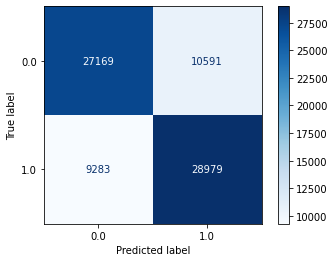

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test,cmap='Blues')
plt.grid(False)

## Random Forrest + Feature Selection

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
importances = rf.feature_importances_
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [22]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.133 seconds


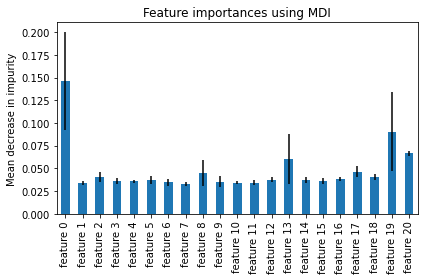

In [23]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [24]:
y_pred = rf.predict(x_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[34143  3617]
 [  403 37859]]
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     37760
         1.0       0.91      0.99      0.95     38262

    accuracy                           0.95     76022
   macro avg       0.95      0.95      0.95     76022
weighted avg       0.95      0.95      0.95     76022



/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


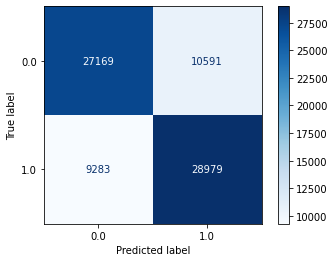

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test,cmap='Blues')
plt.grid(False)

In [ ]:
# Plot ROC Curve

# import scikitplot as skplt
# import matplotlib.pyplot as plt

# y_true = y_test
# y_probas = y_pred
# skplt.metrics.plot_roc_curve(y_true, y_probas)
# plt.show()

## Gradient Booster

In [27]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier().fit(x_train, y_train)
clf.score(x_test, y_test)

0.7435873825997737

In [28]:
y_pred = clf.predict(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


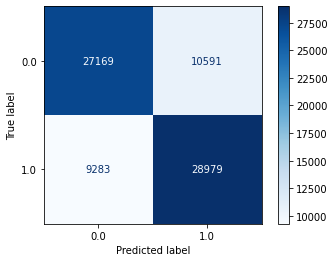

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test,cmap='Blues')
plt.grid(False)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26580 11180]
 [ 8313 29949]]
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     37760
         1.0       0.73      0.78      0.75     38262

    accuracy                           0.74     76022
   macro avg       0.74      0.74      0.74     76022
weighted avg       0.74      0.74      0.74     76022



## KNN Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = classifier.predict(x_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) #f1 score is better for 1 but not by much - will need continuous variables.

[[26244 11516]
 [ 2637 35625]]
              precision    recall  f1-score   support

         0.0       0.91      0.70      0.79     37760
         1.0       0.76      0.93      0.83     38262

    accuracy                           0.81     76022
   macro avg       0.83      0.81      0.81     76022
weighted avg       0.83      0.81      0.81     76022



/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


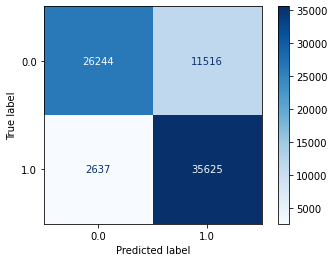

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test,cmap='Blues')
plt.grid(False)

## <span style="color:green">Conclusion</span>

#### For this analysis Random Forrest performs the best followed by KNN